# 线性回归

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x), Variable(y)

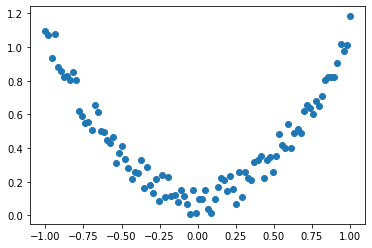

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x


In [5]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


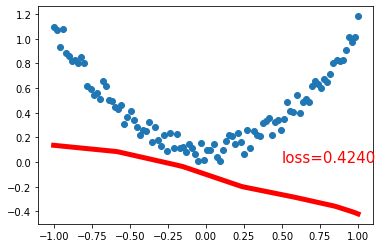

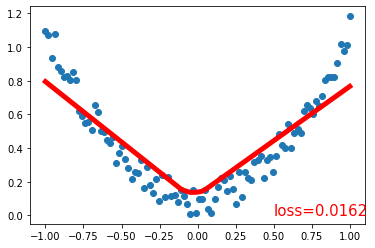

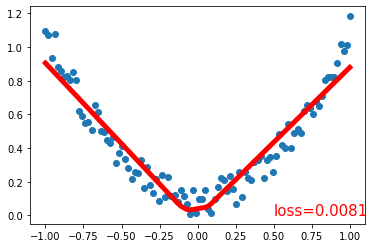

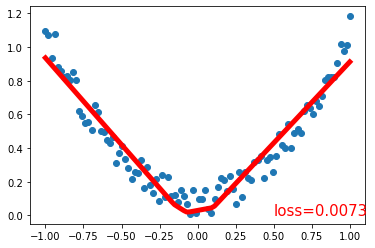

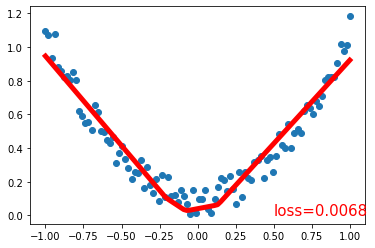

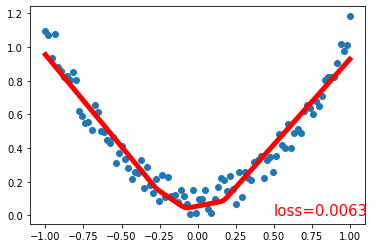

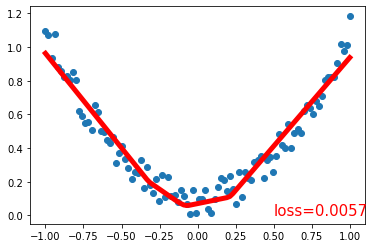

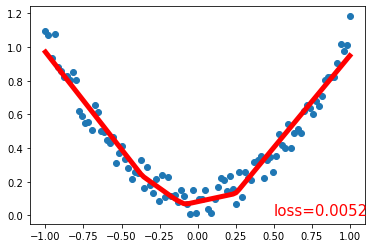

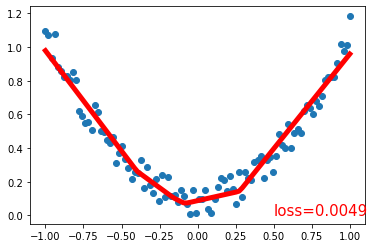

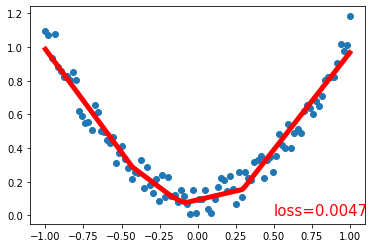

In [6]:
opt = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

plt.ion()

for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    if t % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'loss=%.4f' % loss.data.numpy(), fontdict={'size': 15, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()